In [11]:
car_data='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

In [23]:
import pandas as pd
df=pd.read_csv(car_data, header=None)


In [67]:
columns=['buying','maintainance','doors','persons','lug_boot','safety','class']
df = pd.read_csv(car_data, names=columns)
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [73]:
df=df.replace({'buying' : { 'low' : 0, 'med' : 1, 'high' : 2, 'vhigh' :3 }})
df=df.replace({'maintainance' : { 'low' : 0, 'med' : 1, 'high' : 2, 'vhigh' :3 }})
df=df.replace({'doors' : { '2' : 2, '3' : 3, '4' : 4, '5more' : 5}})
df=df.replace({'persons' : { '2':2,'4':4,'more' : 5}})
df=df.replace({'lug_boot' : { 'small' : 0, 'med' : 1, 'big' : 2}})
df=df.replace({'safety' : { 'low' : 0, 'med' : 1, 'high' : 2}})
df=df.replace({'class' : { 'unacc' : 0, 'acc' : 1, 'good' : 2, 'vgood' :3 }})
df

,buying,maintainance,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


In [76]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: class, Length: 1728, dtype: int64

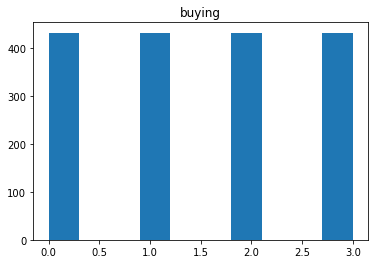

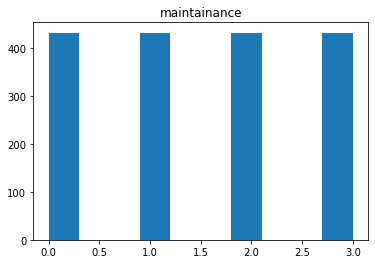

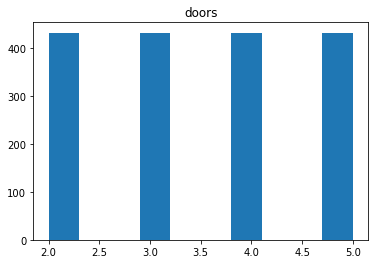

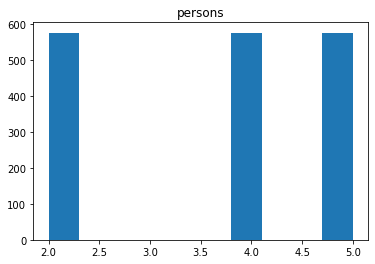

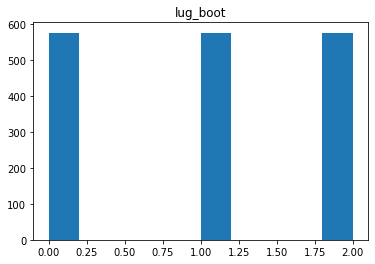

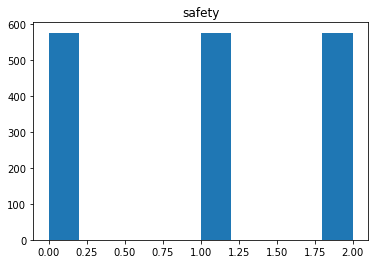

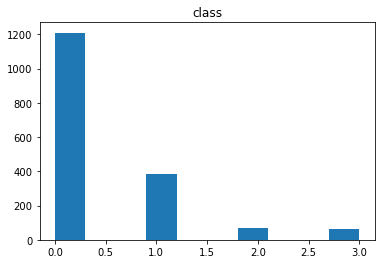

In [77]:
import matplotlib.pyplot as plt
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
X_train

,buying,maintainance,doors,persons,lug_boot,safety
1178,1,1,5,4,2,2
585,2,2,3,5,0,0
1552,0,1,3,4,1,1
1169,1,1,5,2,2,2
1033,1,2,4,2,2,1
...,...,...,...,...,...,...
1130,1,1,3,5,1,2
1294,1,0,5,5,2,1
860,2,0,5,5,1,2
1459,0,2,4,2,0,1


In [80]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)

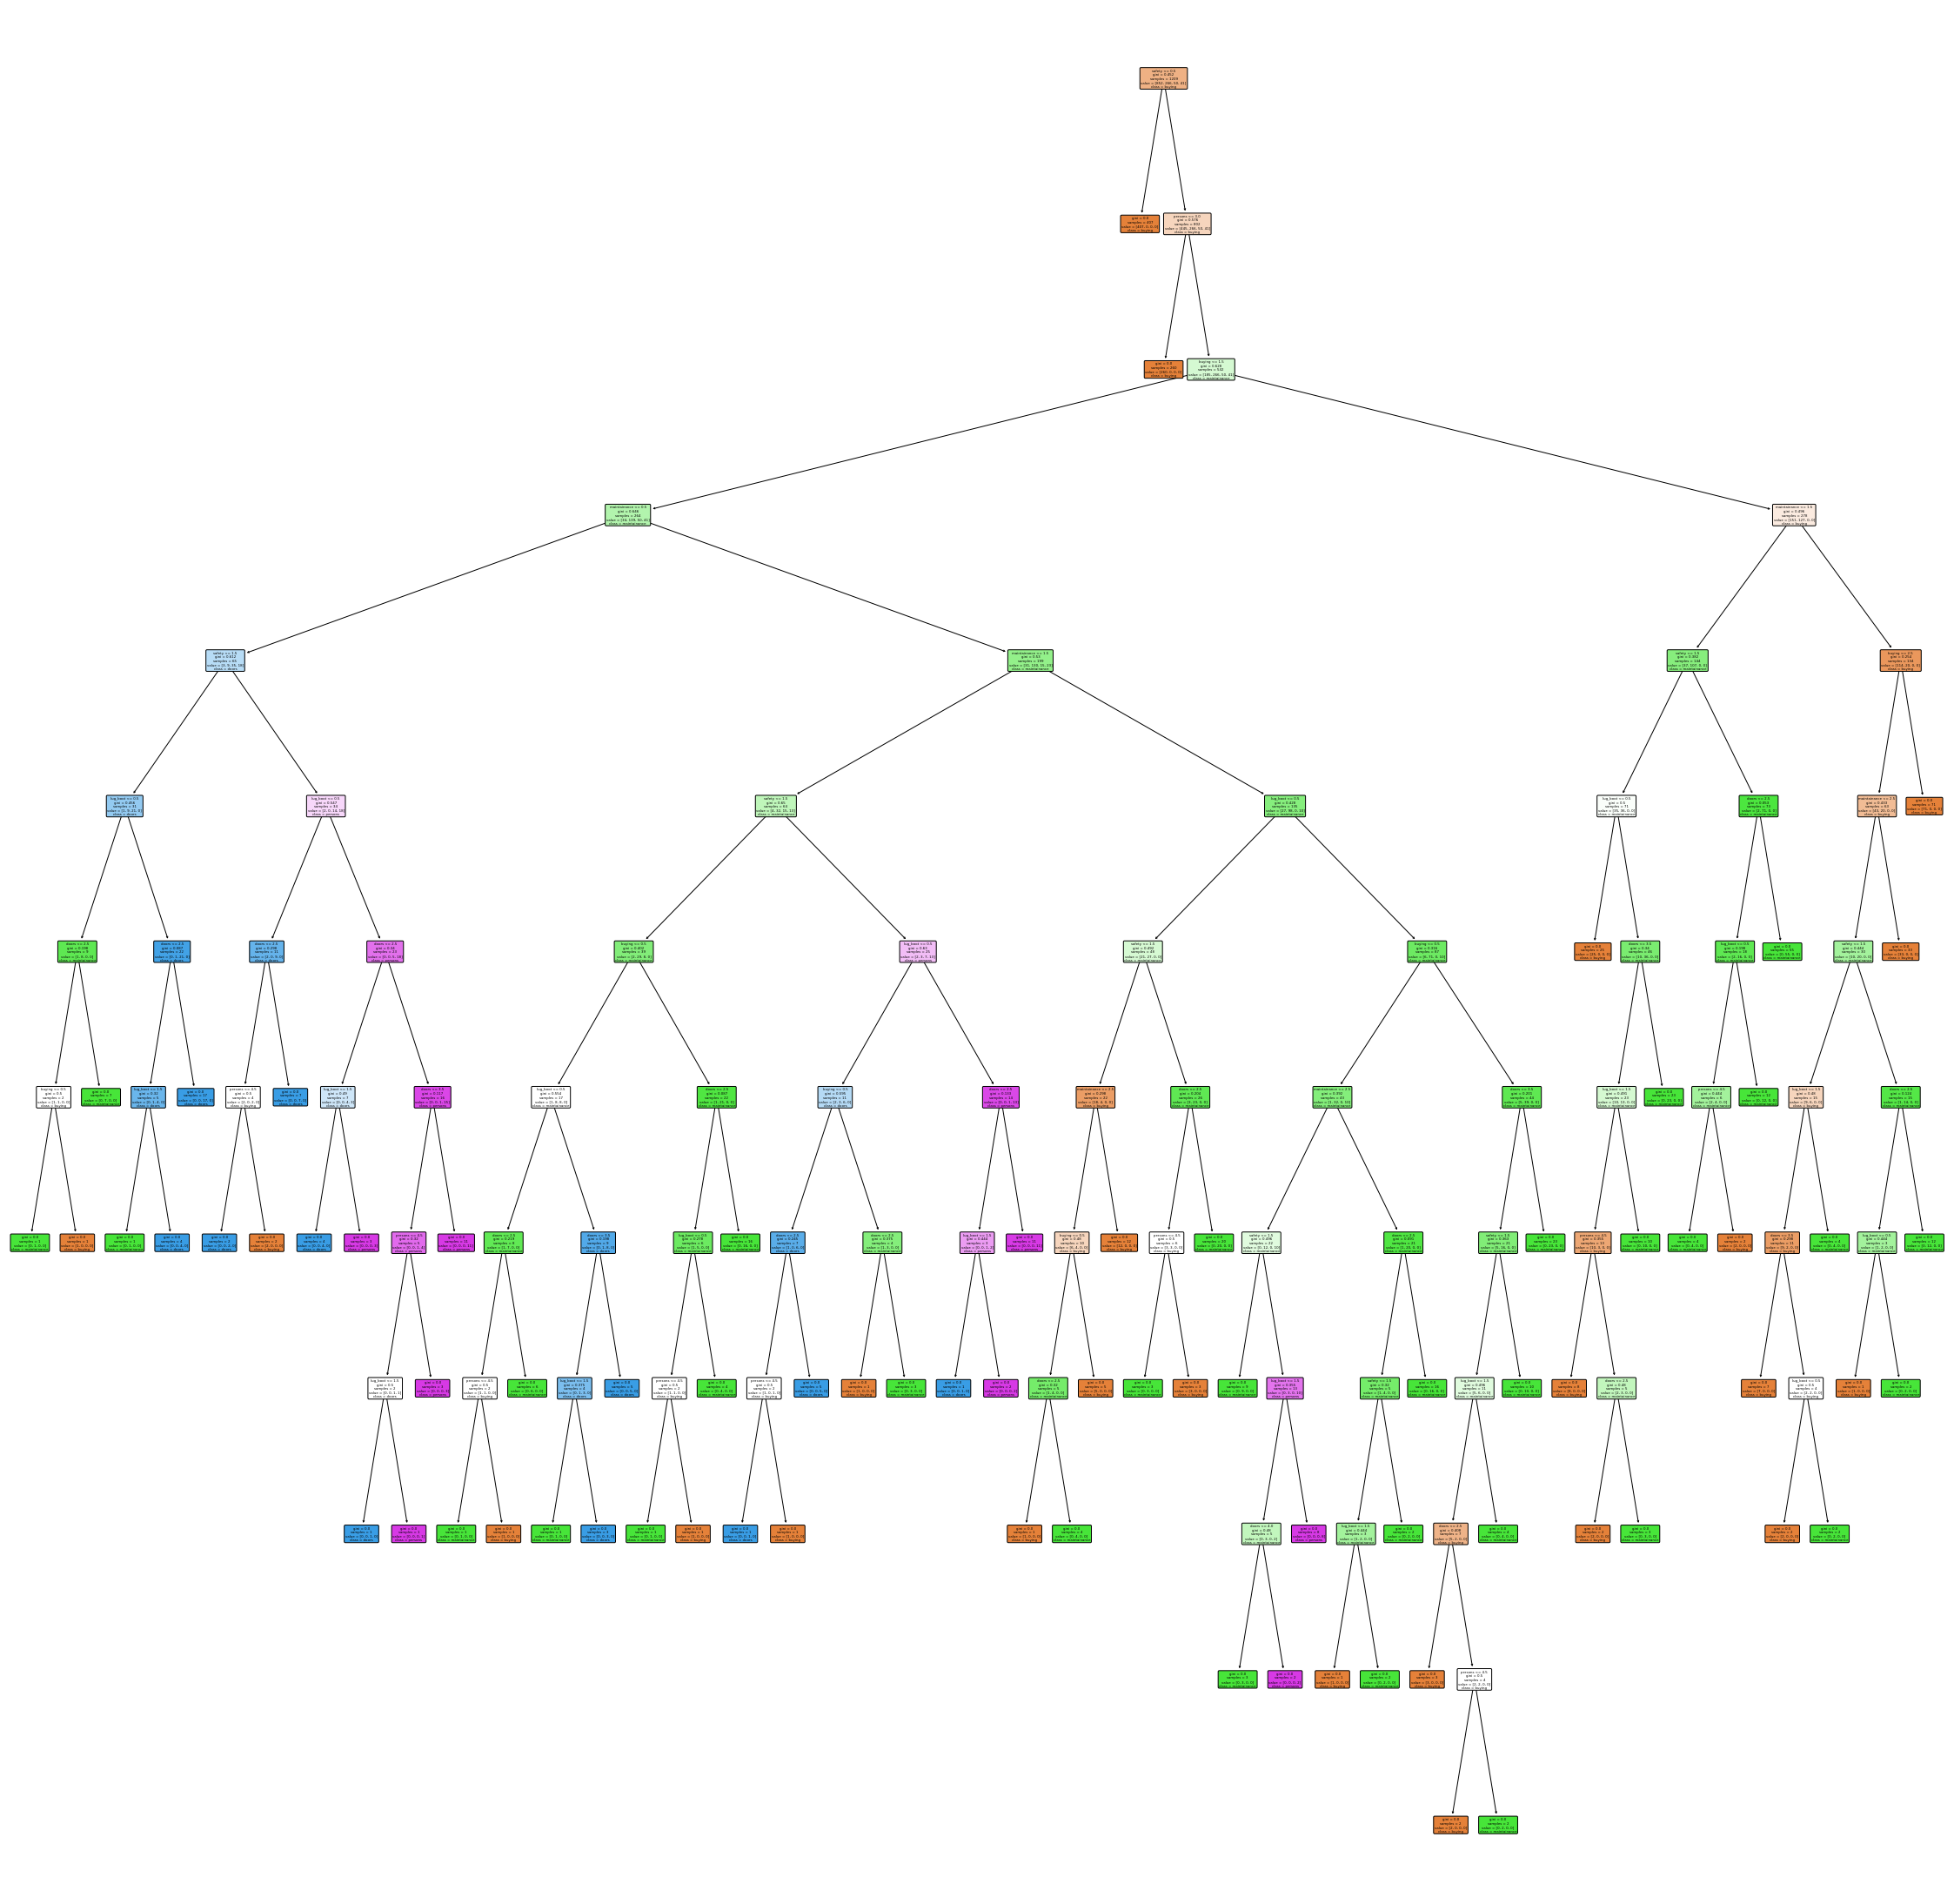

In [82]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=['buying','maintainance','doors','persons','lug_boot','safety','class'],
         feature_names=X.columns)
plt.show()

In [83]:
predictions=dt_clf.predict(X_test)
(y_test==predictions).sum()/len(y_test)

0.9672447013487476

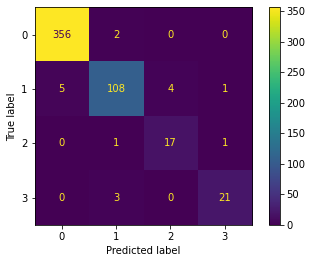

In [84]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_clf, X_test, y_test)